In [1]:
import tensorflow as tf 
from tensorflow import keras#api
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mnist import MNIST#library
emnist = MNIST('emnist_data')
emnist.select_emnist('balanced')#Here for each char there are equal no. of images to train data 2400im
trainIM,trainL AB = emnist.load_training()
testIM,testLAB = emnist.load_testing()

In [3]:
trainIM=np.array(trainIM)
trainLAB=np.array(trainLAB)
testIM=np.array(testIM)
testLAB=np.array(testLAB)
#for resizing

In [4]:
trainIM=np.array(trainIM).reshape(-1,28,28)
testIM=np.array(testIM).reshape(-1,28,28)
#so it can be plotted

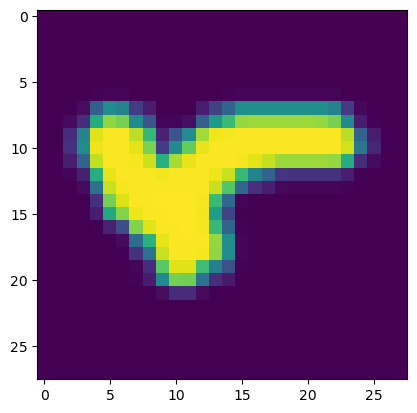

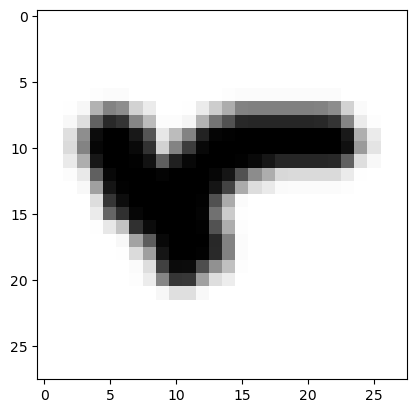

In [5]:
plt.imshow(trainIM[0])
plt.show()
plt.imshow(trainIM[0],cmap = plt.cm.binary)#cm.binary has reverted the pixels so black is white and vice versa

In [6]:
print(trainIM[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   4   4   0   0   0   0   0   0   0   2   4   4   4
    4   4   4   4   4   0   0   0   0   0]
 [  0   0   1   8  77 124 114  45  20   0   0   1  20  50  82 125 127 127
  127 127 127 125 114  45   5   0   0   0]
 [  0   0   7  33 158 213 203 122  67   3   3  10  77 139 172 21

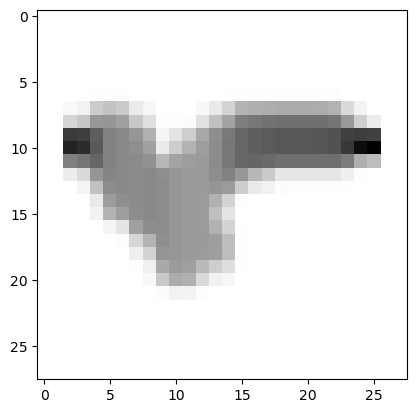

In [7]:
trainIM=tf.keras.utils.normalize(trainIM,axis=1)#easy calc
testIM=tf.keras.utils.normalize(testIM,axis=1)
plt.imshow(trainIM[0],cmap = plt.cm.binary)
#convert bw 0to1

In [8]:
print(trainIM[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
trainr=np.array(trainIM).reshape(-1,28,28,1)#inc 1 dimention to put convonutional layer
testr=np.array(testIM).reshape(-1,28,28,1)
print("Training Samples dimension",trainr.shape)
print("Testing Samples dimension",testr.shape)

Training Samples dimension (112800, 28, 28, 1)
Testing Samples dimension (18800, 28, 28, 1)


In [10]:
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=trainr.shape[1:]))#64 kernels and 3,3 filters
model.add(Activation("relu"))# activation function to make it non linear, values <0=remove them
model.add(MaxPooling2D(pool_size=(2,2)))#max value of 2x2 matrix and rest will be removed

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())#before fully connected layer we need to flatten from 2D to 1D
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(64))#we're reducing size bc minimum is 47
model.add(Activation("relu"))

model.add(Dense(47))#this last dense layer must be 47
model.add(Activation("softmax"))#softmax gives class probabilities for multiple classes

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.fit(trainr,trainLAB,epochs=5,validation_split=0.3)

Epoch 1/5
2468/2468 [==============================] - 58s 23ms/step - loss: 1.3009 - accuracy: 0.6061 - val_loss: 0.8076 - val_accuracy: 0.7378
Epoch 2/5
2468/2468 [==============================] - 58s 24ms/step - loss: 0.6908 - accuracy: 0.7708 - val_loss: 0.6433 - val_accuracy: 0.7815
Epoch 3/5
2468/2468 [==============================] - 59s 24ms/step - loss: 0.5781 - accuracy: 0.8056 - val_loss: 0.5620 - val_accuracy: 0.8137
Epoch 4/5
2468/2468 [==============================] - 64s 26ms/step - loss: 0.5156 - accuracy: 0.8235 - val_loss: 0.5714 - val_accuracy: 0.8026
Epoch 5/5
2468/2468 [==============================] - 76s 31ms/step - loss: 0.4733 - accuracy: 0.8354 - val_loss: 0.4956 - val_accuracy: 0.8291


In [14]:
test_loss,test_acc=model.evaluate(testr,testLAB)

588/588 [==============================] - 6s 10ms/step - loss: 0.5113 - accuracy: 0.8289


In [15]:
predictions=model.predict([testr])

588/588 [==============================] - 6s 10ms/step


In [16]:
print(predictions)

[[1.8327262e-06 3.6536233e-06 1.2153641e-06 ... 1.7675139e-02
  9.1439013e-08 5.9920699e-06]
 [9.1766433e-06 1.4703554e-09 4.5899844e-07 ... 3.8468050e-05
  1.7793867e-05 8.5716847e-06]
 [1.9735880e-09 4.5860342e-09 9.3432671e-11 ... 1.4198478e-01
  1.1770640e-08 8.2754266e-09]
 ...
 [4.5335189e-05 3.2296583e-01 7.1456860e-05 ... 2.0407540e-04
  9.3655370e-05 7.8475784e-04]
 [2.1231732e-05 2.1146069e-11 4.3061309e-06 ... 1.3777419e-02
  1.0256801e-08 4.1911367e-11]
 [3.8676834e-10 8.4732712e-08 2.5247806e-07 ... 4.4129160e-06
  3.8467665e-04 6.7971309e-06]]


In [17]:
print(np.argmax(predictions[1]))# so actually aramax will return the maximum value index and find the value of it

39


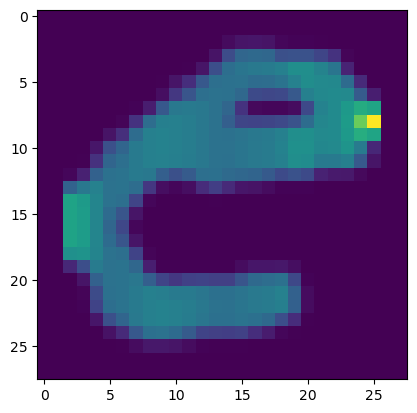

In [18]:
plt.imshow(testr[1])
#labels_dict ={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',
#18:'I',19:'J',20:'K',21:'l',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'u',31:'V',32:'W',33:'X',
#34:'Y',35:'Z',36:'a',37:'b',38:'d',39:'e',40:'f',41:'g',42:'h',43:'n',44:'q',45:'r',46:'t'}

In [19]:
model.save('model.keras')

In [21]:
arr=[[1,2,3,4],[5,6,7,8],[1,5,7,4],[5,3,0,1]]
for i in range(len(arr)):
    for j in range(len(arr[0])):
        print(arr[i][j],end=" ")
    print("\n")

1 2 3 4 

5 6 7 8 

1 5 7 4 

5 3 0 1 

